In [ ]:
cd/content/drive/MyDrive/class/vision

/content/drive/MyDrive/class/vision


In [ ]:
!unzip archive.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jpg  
  inflating

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, BatchNormalization, Dropout, AvgPool2D
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.attention.multi_head_attention import regularization
from keras.models import Sequential

from keras import Input
from keras.utils import to_categorical
from keras.optimizers import Adam 

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_loader = img_gen.flow_from_directory(
    directory='seg_train/seg_train', target_size=(128,128), batch_size=64, seed=42 
)
test_loader = img_gen.flow_from_directory(
    directory='seg_test/seg_test', target_size=(128,128), batch_size=64, seed=42
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
train_loader.class_indices #분류시 해당 특성을 번호로 나타냄(라벨링)

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
idx_to_classes = {val: key for key,val in train_loader.class_indices.items() }

In [ ]:
idx_to_classes

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3,strides=1, padding='same',activation='relu',input_shape=(128,128,3)))
model.add(AvgPool2D(3))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 average_pooling2d (AverageP  (None, 42, 42, 32)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 42, 42, 32)       128       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 56448)             0         
                                                                 
 dense (Dense)               (None, 16)                903184    
                                                                 
 dense_1 (Dense)             (None, 6)                 1

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
hist = model.fit(train_loader, epochs=20, validation_data =  test_loader, verbose=2)

Epoch 1/20
220/220 - 43s - loss: 1.1739 - accuracy: 0.5874 - val_loss: 1.7344 - val_accuracy: 0.2847 - 43s/epoch - 196ms/step
Epoch 2/20
220/220 - 33s - loss: 0.7141 - accuracy: 0.7350 - val_loss: 1.2657 - val_accuracy: 0.4660 - 33s/epoch - 152ms/step
Epoch 3/20
220/220 - 36s - loss: 0.5012 - accuracy: 0.8194 - val_loss: 0.8544 - val_accuracy: 0.6823 - 36s/epoch - 161ms/step
Epoch 4/20
220/220 - 34s - loss: 0.3558 - accuracy: 0.8740 - val_loss: 1.1070 - val_accuracy: 0.6800 - 34s/epoch - 155ms/step
Epoch 5/20
220/220 - 33s - loss: 0.2421 - accuracy: 0.9181 - val_loss: 1.1592 - val_accuracy: 0.7010 - 33s/epoch - 152ms/step
Epoch 6/20
220/220 - 34s - loss: 0.1800 - accuracy: 0.9416 - val_loss: 1.2622 - val_accuracy: 0.7007 - 34s/epoch - 152ms/step
Epoch 7/20
220/220 - 33s - loss: 0.1417 - accuracy: 0.9572 - val_loss: 1.3580 - val_accuracy: 0.7057 - 33s/epoch - 151ms/step
Epoch 8/20
220/220 - 33s - loss: 0.0976 - accuracy: 0.9716 - val_loss: 1.3138 - val_accuracy: 0.7300 - 33s/epoch - 152

In [ ]:
train_loss=hist.history[‘loss’]
train_acc=hist.history[‘accuracy’]
test_loss=hist.history[‘val_loss’]
test_acc=hist.history[‘val_accuracy’]

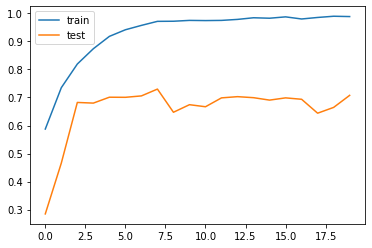

In [ ]:
plt.plot(train_loss,label=‘train_loss’)
plt.plot(test_loss,label=‘test_loss’)
plt.xlabel(‘epoch’)
plt.ylabel(‘loss’)
plt.show()

In [ ]:
plt.plot(test_loss,label=‘train_acc’)
plt.plot(test_acc,label=‘test_acc’)
plt.xlabel(‘epoch’)
plt.ylabel(‘accuracy’)
plt.show()

In [ ]:
import os

In [ ]:
pred_list = [f"seg_pred/seg_pred/{i}" for i in os.listdir('seg_pred/seg_pred')]

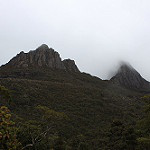

In [ ]:
img =  Image.open(pred_list[6])
display(img)

In [ ]:
img = img.resize((128,128))

In [ ]:
img_arr = np.array(img)

In [ ]:
img_arr = img_arr[np.newaxis, :]

In [ ]:
img_arr = img_arr.astype('float')

In [ ]:
img_arr = img_gen.standardize(img_arr)

In [ ]:
probabbility = model(img_arr)

In [ ]:
pred = np.argmax(probabbility)

In [ ]:
idx_to_classes[pred]

'mountain'